In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import numpy as np
import json
import os

# 1. JSON 파일에서 데이터를 불러오기
json_file_path = 'data/anger.json'  # json 파일의 이름이 실제 파일 이름과 일치해야 합니다

# JSON 파일 읽기
with open(json_file_path, 'r') as f:
    audio_features_data = json.load(f)

# values()를 사용하여 데이터만 추출하고 numpy array로 변환
data = np.array(list(audio_features_data.values()))

# 분위기 레이블: 예시로 3개의 레이블을 부여 (각 노래에 실제 레이블을 할당해야 합니다)
# 예시 레이블, 실제 데이터에 맞게 수정하세요
# anger, disgust, fear, joy, neutral, sadness, surprise
num_samples = len(data)
# 0: anger, 1: joy, 2: neutral, 3: sadness 
labels = [0] * 69 + [1] * 95  + [2] * 30  + [3] * 100 + [4] * 60 + [5] * 60 + [6] * 54

Length of data (audio features): 450
Length of labels: 450


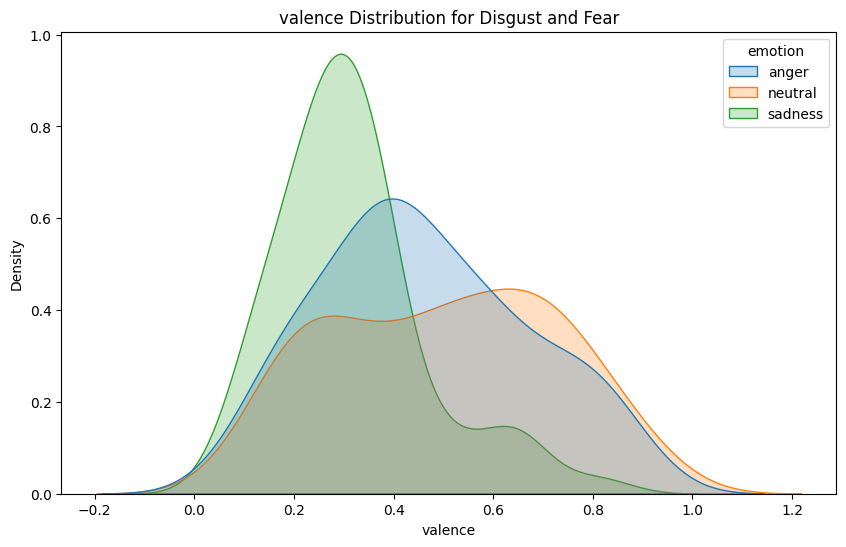

In [58]:
import torch
import numpy as np
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. JSON 파일에서 데이터를 불러오기
json_file_path = 'audio_features_data.json'  # json 파일의 이름이 실제 파일 이름과 일치해야 합니다

# JSON 파일 읽기
with open(json_file_path, 'r') as f:
    audio_features_data = json.load(f)

# values()를 사용하여 데이터만 추출하고 numpy array로 변환
data = np.array(list(audio_features_data.values()))

# 데이터와 레이블 길이 확인
print(f"Length of data (audio features): {len(data)}")
print(f"Length of labels: {len(labels)}")

# 분위기 레이블: 예시로 3개의 레이블을 부여 (각 노래에 실제 레이블을 할당해야 합니다)

labels = [0] * 69 + [1] * 95  + [2] * 30  + [3] * 100 + [4] * 60 + [5] * 60 + [6] * 54
# 2. 길이 맞추기: 필요시 레이블 배열 잘라내기
if len(data) == len(labels):
    print("Lengths match. Proceeding with DataFrame creation.")
else:
    print("Warning: Lengths do not match. Adjusting the size of labels.")
    labels = labels[:len(data)]  # 데이터 길이에 맞게 레이블을 자르기

# emotion 레이블 추가
emotion_labels = ["anger", "disgust", "fear", "joy", "neutral", "sadness", "surprise"]  # 7개의 감정 레이블 리스트

# 오디오 피처와 감정 레이블을 DataFrame으로 변환
audio_features_df = pd.DataFrame(data, columns=['tempo', 'valence', 'energy', 'danceability', 'acousticness', 'speechiness', 'liveness'])
audio_features_df['emotion'] = [emotion_labels[label] for label in labels]  # labels 배열을 이용하여 감정 레이블 추가

# 2. 시각화하고 싶은 감정 선택 (disgust와 fear만 선택)
emotions_to_visualize = ["neutral", "sadness", "anger"]

# 선택한 감정에 해당하는 데이터만 필터링
filtered_df = audio_features_df[audio_features_df['emotion'].isin(emotions_to_visualize)]

# 3. 시각화: valence에 대한 감정 분포 (disgust와 fear)
feature='valence'
plt.figure(figsize=(10, 6))
sns.kdeplot(data=filtered_df, x=feature, hue='emotion', fill=True)  # 선택한 감정별 valence 분포
plt.title(f'{feature} Distribution for Disgust and Fear')
plt.show()

In [19]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,


# MLP

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import numpy as np
import json
import os
from sklearn.preprocessing import MinMaxScaler

# 1. 각 레이블별 JSON 파일을 불러오기
# 예를 들어, 각 파일 이름이 'emotion_0.json', 'emotion_1.json', ... 이렇게 되어 있다고 가정
label_files = {
    0: 'data/anger.json',
    1: 'data/joy.json',
    2: 'data/neutral.json',
    3: 'data/sadness.json'
}

features = []
labels = []

# 각 파일을 열고 데이터와 레이블을 추가
for label, file_path in label_files.items():
    with open(file_path, 'r') as f:
        data = json.load(f)
        features.extend(list(data.values()))  # 피처 추가
        labels.extend([label] * len(data))  # 해당 레이블로 라벨링

# numpy array로 변환
features = np.array(features)
labels = np.array(labels)

# 2. 피처 스케일링 (정규화)
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(features)

# 3. 커스텀 데이터셋 정의
class AudioFeatureDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        feature = self.features[idx]
        label = self.labels[idx]
        return torch.tensor(feature, dtype=torch.float32), torch.tensor(label, dtype=torch.long)

# 4. 데이터셋 및 DataLoader 생성
dataset = AudioFeatureDataset(normalized_data, labels)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# 6. 간단한 신경망 모델 정의 (여기서 MLP 사용)
class AudioEmotionClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(AudioEmotionClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# 7. 모델 초기화 및 학습 설정
input_size = normalized_data.shape[1]  # 피처 개수
hidden_size = 64  # 은닉층의 크기
num_classes = 4  # 감정 레이블 개수

model = AudioEmotionClassifier(input_size, hidden_size, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 8. 모델 학습
num_epochs = 1000

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(dataloader):.4f}')

print("Training completed.")

# 9. 모델 저장
model_save_path = 'audio_emotion_classifier.pth'  # 모델을 저장할 경로
torch.save(model.state_dict(), model_save_path)
print(f"Model saved at {model_save_path}")

# 10. 저장된 모델 불러오기 (필요할 때)
loaded_model = AudioEmotionClassifier(input_size, hidden_size, num_classes)
loaded_model.load_state_dict(torch.load(model_save_path))
loaded_model.eval()  # 모델을 평가 모드로 전환
print("Model loaded and ready for inference.")


Epoch [1/1000], Loss: 1.3299
Epoch [2/1000], Loss: 1.2888
Epoch [3/1000], Loss: 1.2562
Epoch [4/1000], Loss: 1.2204
Epoch [5/1000], Loss: 1.1815
Epoch [6/1000], Loss: 1.1435
Epoch [7/1000], Loss: 1.0978
Epoch [8/1000], Loss: 1.0585
Epoch [9/1000], Loss: 1.0153
Epoch [10/1000], Loss: 0.9729
Epoch [11/1000], Loss: 0.9394
Epoch [12/1000], Loss: 0.9072
Epoch [13/1000], Loss: 0.8729
Epoch [14/1000], Loss: 0.8445
Epoch [15/1000], Loss: 0.8237
Epoch [16/1000], Loss: 0.8043
Epoch [17/1000], Loss: 0.7852
Epoch [18/1000], Loss: 0.7674
Epoch [19/1000], Loss: 0.7543
Epoch [20/1000], Loss: 0.7435
Epoch [21/1000], Loss: 0.7282
Epoch [22/1000], Loss: 0.7191
Epoch [23/1000], Loss: 0.7116
Epoch [24/1000], Loss: 0.6993
Epoch [25/1000], Loss: 0.6929
Epoch [26/1000], Loss: 0.6813
Epoch [27/1000], Loss: 0.6763
Epoch [28/1000], Loss: 0.6734
Epoch [29/1000], Loss: 0.6654
Epoch [30/1000], Loss: 0.6567
Epoch [31/1000], Loss: 0.6544
Epoch [32/1000], Loss: 0.6487
Epoch [33/1000], Loss: 0.6427
Epoch [34/1000], Lo

# TabNet

In [6]:
import numpy as np
import json
from sklearn.model_selection import train_test_split
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.preprocessing import LabelEncoder
import torch

# 각 레이블별 JSON 파일 경로
label_files = {
    "anger": 'data/anger.json',
    "joy": 'data/joy.json',
    "neutral": 'data/neutral.json',
    "sadness": 'data/sadness.json'
}

# 데이터와 라벨을 저장할 리스트 초기화
features = []
labels = []

# 각 파일을 열고 데이터와 레이블 추가
for label_name, file_path in label_files.items():
    with open(file_path, 'r') as f:
        data = json.load(f)
        features.extend(list(data.values()))  # 피처 추가
        labels.extend([label_name] * len(data))  # 해당 라벨 추가

# numpy array로 변환
features = np.array(features)
labels = np.array(labels)

# 레이블을 숫자로 인코딩
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# 학습/검증 데이터 분할
X_train, X_valid, y_train, y_valid = train_test_split(features, encoded_labels, test_size=0.2, random_state=42)

# 4. TabNet 모델 정의 및 학습
# 모델 초기화
clf = TabNetClassifier()

# 모델 학습
clf.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    eval_name=["val"],
    eval_metric=["accuracy"],
    max_epochs=1000,
    patience=10,
    batch_size=32,  # 배치 사이즈는 16 또는 32로 설정 가능
    virtual_batch_size=8,  # 미니 배치 크기 설정
)

# 5. 모델 저장 (필요시)
clf.save_model("tabnet_audio_emotion")


c:\Users\LG\anaconda3\envs\gg-project\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.59291 | val_accuracy: 0.24561 |  0:00:00s
epoch 1  | loss: 1.21952 | val_accuracy: 0.40351 |  0:00:00s
epoch 2  | loss: 1.19362 | val_accuracy: 0.49123 |  0:00:00s
epoch 3  | loss: 1.14637 | val_accuracy: 0.45614 |  0:00:01s
epoch 4  | loss: 1.02629 | val_accuracy: 0.42105 |  0:00:01s
epoch 5  | loss: 0.92686 | val_accuracy: 0.42105 |  0:00:01s
epoch 6  | loss: 0.87337 | val_accuracy: 0.47368 |  0:00:02s
epoch 7  | loss: 0.90669 | val_accuracy: 0.35088 |  0:00:02s
epoch 8  | loss: 0.87655 | val_accuracy: 0.31579 |  0:00:02s
epoch 9  | loss: 0.88573 | val_accuracy: 0.22807 |  0:00:02s
epoch 10 | loss: 0.82498 | val_accuracy: 0.26316 |  0:00:03s
epoch 11 | loss: 0.80658 | val_accuracy: 0.36842 |  0:00:03s
epoch 12 | loss: 0.86381 | val_accuracy: 0.50877 |  0:00:03s
epoch 13 | loss: 0.81614 | val_accuracy: 0.47368 |  0:00:04s
epoch 14 | loss: 0.71015 | val_accuracy: 0.50877 |  0:00:04s
epoch 15 | loss: 0.76041 | val_accuracy: 0.47368 |  0:00:04s
epoch 16 | loss: 0.77609

c:\Users\LG\anaconda3\envs\gg-project\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


'tabnet_audio_emotion.zip'

# MLP 모델로 추론해보기. 아무 플레이리스트나 넣어보시오

In [15]:
import torch
import torch.nn as nn
import numpy as np
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import os
from sklearn.preprocessing import MinMaxScaler

# Spotify API 인증 설정
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(
    client_id="0f9a6c744c494cba948ec67949d9158c",       # Spotify에서 발급받은 Client ID
    client_secret="bdaffd4b3d514ee48aae9842ecffa0cf" # Spotify에서 발급받은 Client Secret
))

# 플레이리스트 ID를 통해 트랙 ID 가져오는 함수
def get_playlist_track_ids(playlist_id):
    results = sp.playlist_tracks(playlist_id)
    tracks = results['items']
    
    track_ids = []
    
    # 플레이리스트 내 모든 트랙의 ID를 track_ids 리스트에 추가
    for item in tracks:
        track = item['track']
        track_ids.append(track['id'])
    
    return track_ids

# 필요한 오디오 피쳐를 가져오는 함수
def get_selected_audio_features(track_id):
    features = sp.audio_features(track_id)
    if features and features[0]:  # features[0]이 None이 아닌 경우
        audio_features = features[0]
        # 7가지 피쳐를 리스트 형태로 추출
        selected_features = [
            audio_features['tempo'],
            audio_features['valence'],
            audio_features['energy'],
            audio_features['danceability'],
            audio_features['acousticness'],
            audio_features['speechiness'],
            audio_features['liveness']
        ]
        return selected_features
    return None

# 트랙 ID를 통해 노래 제목 가져오기
def get_track_name(track_id):
    track_info = sp.track(track_id)
    if track_info:
        return track_info['name']
    return None

# 여러 트랙에 대해 오디오 피처를 가져와 new_audio_features에 저장
def process_tracks_for_prediction(track_ids):
    all_features = []
    track_names = []
    
    for track_id in track_ids:
        try:
            track_name = get_track_name(track_id)
            if not track_name:
                print(f"트랙 이름을 가져올 수 없습니다: {track_id}")
                continue
            
            selected_features = get_selected_audio_features(track_id)
            if selected_features:
                print(f"트랙 {track_name}의 오디오 피쳐가 업데이트되었습니다.")
                all_features.append(selected_features)  # 각 트랙의 피처 추가
                track_names.append(track_name)  # 트랙 이름 저장
            else:
                print(f"해당 트랙에 대한 오디오 피쳐를 가져올 수 없습니다: {track_name} ({track_id})")
        except Exception as e:
            print(f"오류 발생: {e} (트랙 ID: {track_id})")
    
    return np.array(all_features), track_names  # 여러 트랙의 피처와 이름 반환

# 예시 플레이리스트 ID
playlist_id = '3lOwaRgxpvjkNpBPKNYuRR'

# 플레이리스트에 담긴 트랙 ID 가져오기
track_ids = get_playlist_track_ids(playlist_id)

# 100개 트랙의 오디오 피처 가져오기
new_audio_features, track_names = process_tracks_for_prediction(track_ids)

# 1. 스케일러 초기화 및 학습
scaler = MinMaxScaler()
scaler.fit(new_audio_features)

# 2. 학습된 스케일러를 사용해 데이터를 정규화
normalized_audio_features = scaler.transform(new_audio_features)

# 모델 불러오기
input_size = normalized_audio_features.shape[1]
hidden_size = 64  # 은닉층 크기
num_classes = 4  # 감정 레이블 개수

model = AudioEmotionClassifier(input_size, hidden_size, num_classes)
model.load_state_dict(torch.load('audio_emotion_classifier.pth'))
model.eval()

# 각 노래에 대해 감정 예측
for i, features in enumerate(normalized_audio_features):
    new_audio_tensor = torch.tensor(features, dtype=torch.float32).unsqueeze(0)  # 1차원 배열을 배치로 변환
    prediction = model(new_audio_tensor)
    predicted_label = torch.argmax(prediction).item()
    
    print(f"Track: {track_names[i]} (ID: {track_ids[i]}), Predicted Emotion Label: {predicted_label}")


트랙 PUZZLE (Feat. CHEEZE)의 오디오 피쳐가 업데이트되었습니다.
트랙 After a few summers (My love X TOIL, Gist)의 오디오 피쳐가 업데이트되었습니다.
트랙 actually의 오디오 피쳐가 업데이트되었습니다.
트랙 Return (Feat. sokodomo)의 오디오 피쳐가 업데이트되었습니다.
트랙 End Better (Feat. Skinny Brown)의 오디오 피쳐가 업데이트되었습니다.
트랙 I′ll be there (Feat. Gist, Han Yo Han)의 오디오 피쳐가 업데이트되었습니다.
트랙 Actually Pt.2의 오디오 피쳐가 업데이트되었습니다.
트랙 Trouble (Feat. Ahn Byeong Woong)의 오디오 피쳐가 업데이트되었습니다.
트랙 Eyes on me (Feat. PARK HYEON JIN)의 오디오 피쳐가 업데이트되었습니다.
트랙 don't leave me의 오디오 피쳐가 업데이트되었습니다.
트랙 OST ( Feat.CHANMINA )의 오디오 피쳐가 업데이트되었습니다.
트랙 first love (Feat. ASH ISLAND)의 오디오 피쳐가 업데이트되었습니다.
트랙 SUMMER의 오디오 피쳐가 업데이트되었습니다.
트랙 Goodbye (Feat. Paul Blanco)의 오디오 피쳐가 업데이트되었습니다.
트랙 내가 만든 노래의 오디오 피쳐가 업데이트되었습니다.
Track: PUZZLE (Feat. CHEEZE) (ID: 0qmc0EP9ZCINdZU3fHGwjK), Predicted Emotion Label: 2
Track: After a few summers (My love X TOIL, Gist) (ID: 2883Ewc2bLnXl77u6sANcP), Predicted Emotion Label: 3
Track: actually (ID: 7u2fcMmCUvboH1G2nYQFRP), Predicted Emotion Label: 1
Track: Return (Feat. sokodom

# TabNet으로 추론하기

In [14]:
import numpy as np
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from sklearn.preprocessing import MinMaxScaler
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

# Spotify API 인증 설정
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(
    client_id="0f9a6c744c494cba948ec67949d9158c",  # Spotify에서 발급받은 Client ID
    client_secret="bdaffd4b3d514ee48aae9842ecffa0cf"  # Spotify에서 발급받은 Client Secret
))

# 플레이리스트 ID를 통해 트랙 ID 가져오는 함수
def get_playlist_track_ids(playlist_id):
    results = sp.playlist_tracks(playlist_id)
    tracks = results['items']
    track_ids = []
    
    # 플레이리스트 내 모든 트랙의 ID를 track_ids 리스트에 추가
    for item in tracks:
        track = item['track']
        track_ids.append(track['id'])
    
    return track_ids

# 필요한 오디오 피쳐를 가져오는 함수
def get_selected_audio_features(track_id):
    features = sp.audio_features(track_id)
    if features and features[0]:  # features[0]이 None이 아닌 경우
        audio_features = features[0]
        # 7가지 피쳐를 리스트 형태로 추출
        selected_features = [
            audio_features['tempo'],
            audio_features['valence'],
            audio_features['energy'],
            audio_features['danceability'],
            audio_features['acousticness'],
            audio_features['speechiness'],
            audio_features['liveness']
        ]
        return selected_features
    return None

# 트랙 ID를 통해 노래 제목 가져오기
def get_track_name(track_id):
    track_info = sp.track(track_id)
    if track_info:
        return track_info['name']
    return None

# 여러 트랙에 대해 오디오 피처를 가져와 new_audio_features에 저장
def process_tracks_for_prediction(track_ids):
    all_features = []
    track_names = []
    
    for track_id in track_ids:
        try:
            track_name = get_track_name(track_id)
            if not track_name:
                print(f"트랙 이름을 가져올 수 없습니다: {track_id}")
                continue
            
            selected_features = get_selected_audio_features(track_id)
            if selected_features:
                print(f"트랙 {track_name}의 오디오 피쳐가 업데이트되었습니다.")
                all_features.append(selected_features)  # 각 트랙의 피처 추가
                track_names.append(track_name)  # 트랙 이름 저장
            else:
                print(f"해당 트랙에 대한 오디오 피쳐를 가져올 수 없습니다: {track_name} ({track_id})")
        except Exception as e:
            print(f"오류 발생: {e} (트랙 ID: {track_id})")
    
    return np.array(all_features), track_names  # 여러 트랙의 피처와 이름 반환

# 예시 플레이리스트 ID
playlist_id = '3lOwaRgxpvjkNpBPKNYuRR'

# 플레이리스트에 담긴 트랙 ID 가져오기
track_ids = get_playlist_track_ids(playlist_id)

# 오디오 피처 가져오기
new_audio_features, track_names = process_tracks_for_prediction(track_ids)

# 1. 스케일러 초기화 및 학습
scaler = MinMaxScaler()
scaler.fit(new_audio_features)

# 2. 학습된 스케일러를 사용해 데이터를 정규화
normalized_audio_features = scaler.transform(new_audio_features)

# TabNet 모델 불러오기
tabnet_model = TabNetClassifier()
tabnet_model.load_model("tabnet_audio_emotion.zip")

# 각 노래에 대해 감정 예측
for i, features in enumerate(normalized_audio_features):
    features = features.reshape(1, -1)  # 각 피처를 2차원 배열로 변환
    prediction = tabnet_model.predict(features)  # TabNet 모델을 사용해 예측
    predicted_label = prediction[0]  # 예측 결과에서 레이블 가져오기
    
    print(f"Track: {track_names[i]} (ID: {track_ids[i]}), Predicted Emotion Label: {predicted_label}")


트랙 PUZZLE (Feat. CHEEZE)의 오디오 피쳐가 업데이트되었습니다.
트랙 After a few summers (My love X TOIL, Gist)의 오디오 피쳐가 업데이트되었습니다.
트랙 actually의 오디오 피쳐가 업데이트되었습니다.
트랙 Return (Feat. sokodomo)의 오디오 피쳐가 업데이트되었습니다.
트랙 End Better (Feat. Skinny Brown)의 오디오 피쳐가 업데이트되었습니다.
트랙 I′ll be there (Feat. Gist, Han Yo Han)의 오디오 피쳐가 업데이트되었습니다.
트랙 Actually Pt.2의 오디오 피쳐가 업데이트되었습니다.
트랙 Trouble (Feat. Ahn Byeong Woong)의 오디오 피쳐가 업데이트되었습니다.
트랙 Eyes on me (Feat. PARK HYEON JIN)의 오디오 피쳐가 업데이트되었습니다.
트랙 don't leave me의 오디오 피쳐가 업데이트되었습니다.
트랙 OST ( Feat.CHANMINA )의 오디오 피쳐가 업데이트되었습니다.
트랙 first love (Feat. ASH ISLAND)의 오디오 피쳐가 업데이트되었습니다.
트랙 SUMMER의 오디오 피쳐가 업데이트되었습니다.
트랙 Goodbye (Feat. Paul Blanco)의 오디오 피쳐가 업데이트되었습니다.
트랙 내가 만든 노래의 오디오 피쳐가 업데이트되었습니다.
Track: PUZZLE (Feat. CHEEZE) (ID: 0qmc0EP9ZCINdZU3fHGwjK), Predicted Emotion Label: 2
Track: After a few summers (My love X TOIL, Gist) (ID: 2883Ewc2bLnXl77u6sANcP), Predicted Emotion Label: 3
Track: actually (ID: 7u2fcMmCUvboH1G2nYQFRP), Predicted Emotion Label: 1
Track: Return (Feat. sokodom

c:\Users\LG\anaconda3\envs\gg-project\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
